# Exploratory Data Analysis on Retail Data 

### Importing of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Reading the Excel dataset 
df= pd.read_excel("C:/Users/SRJ/Desktop/Projects/Online Retail (python).xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Data Cleaning

In [6]:
## Checking for the null values and droping them
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [10]:
## Changing Customer ID data type
df["CustomerID"]=df["CustomerID"].astype("object")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [12]:
## Droping the unwanted columns
df.drop(["InvoiceNo","StockCode"],axis=1, inplace=True)

In [13]:
## Adding a new column
df["Total Sales"]= df["Quantity"]* df["UnitPrice"]

In [14]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
## Checking of the statistical values of the dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,Total Sales
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,248.693370,NaN,69.315162,427.591718


In [16]:
## Adding two new columns
df["Month"] = df["InvoiceDate"].dt.month_name()
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()

In [49]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales,Month,DayOfWeek
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday


### Data Visualisation

In [1]:
## Visualisation of Top 10 Products based on Quantities that have been sold

In [17]:
Top_products = df.groupby("Description")["Quantity"].sum().nlargest(10)
Top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

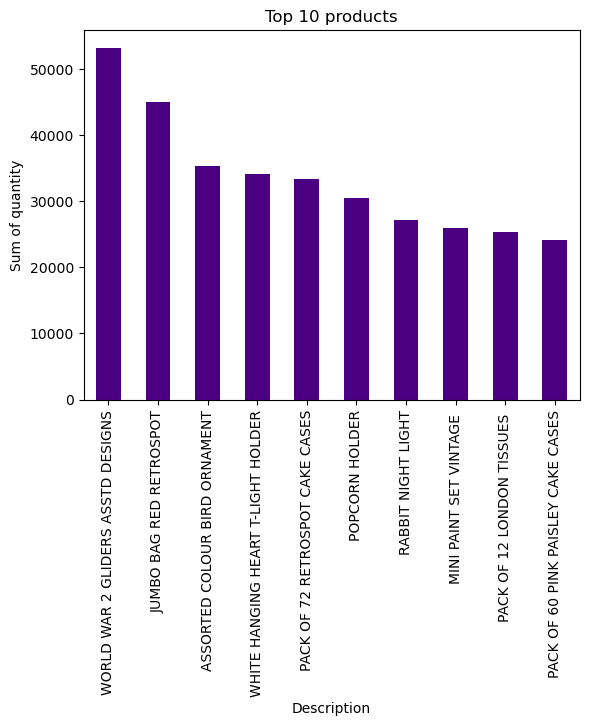

In [59]:
Top_products.plot(kind="bar",color = "indigo")
plt.xlabel("Description")
plt.ylabel("Sum of quantity")
plt.title("Top 10 products")
plt.show()

In [23]:
## Visualisation of Top 10 countries bases on sum of Quantity

In [21]:
Top_products = df.groupby("Country")["Quantity"].sum().nlargest(10)
Top_products

Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Australia           83653
Sweden              35637
Switzerland         29778
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

In [2]:
## Droping United Kingdom because sum of quantitu is much more than the other countries

In [22]:
Top_products = Top_products.drop("United Kingdom")
Top_products

Country
Netherlands    200128
EIRE           136329
Germany        117448
France         109848
Australia       83653
Sweden          35637
Switzerland     29778
Spain           26824
Japan           25218
Name: Quantity, dtype: int64

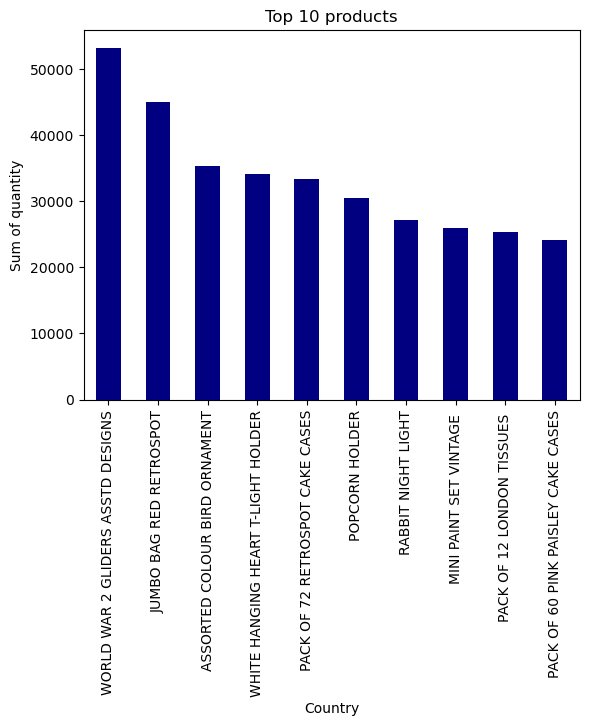

In [34]:
Top_products.plot(kind="bar",color="navy")
plt.xlabel("Country")
plt.ylabel("Sum of quantity")
plt.title("Top 10 products")
plt.show()

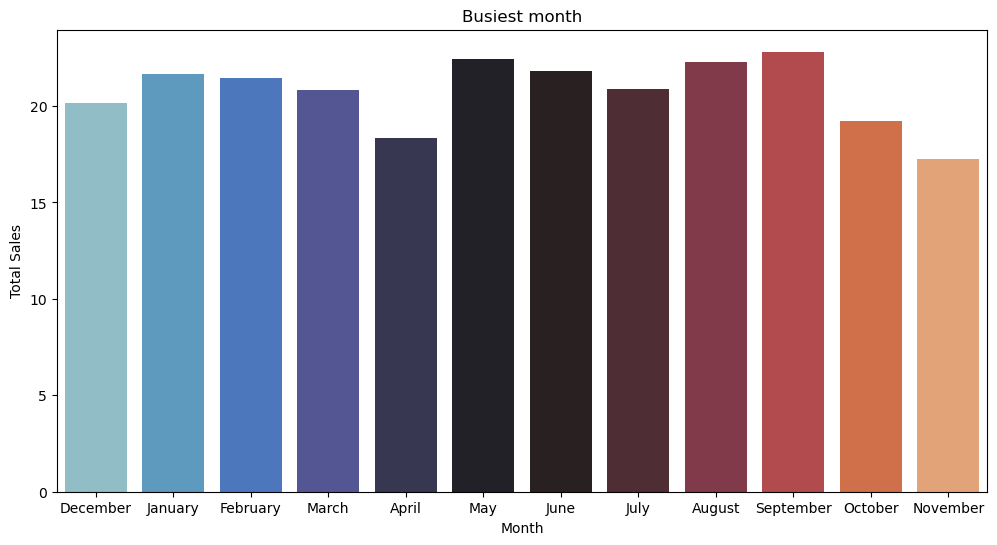

In [46]:
## Busiest Month in terms of Sales
plt.figure (figsize = (12,6))
sns.barplot (x = "Month",y = "Total Sales", data = df, palette = "icefire", errorbar=("ci",False), legend = False, hue = "Month")
plt.title ("Busiest month")
plt.show()

In [33]:
## Busiest Day in terms of Sales

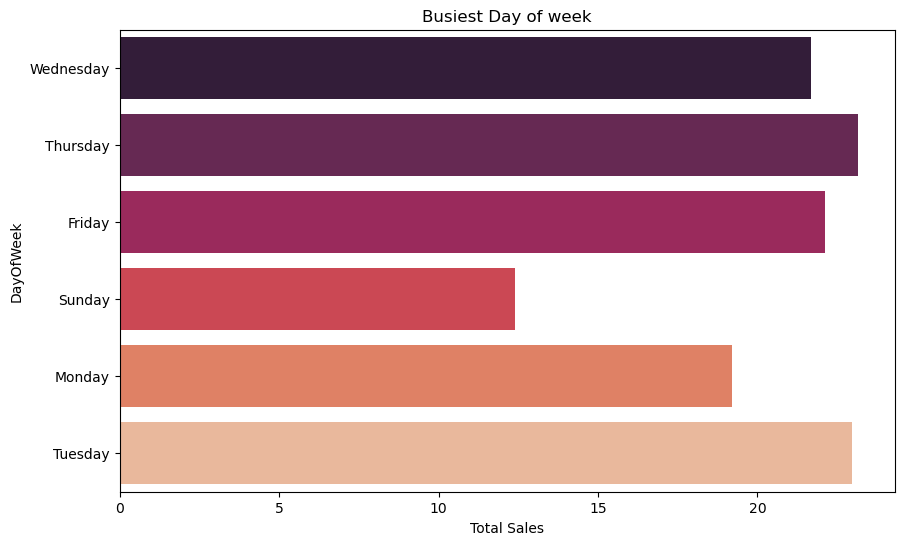

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x ="Total Sales", y = "DayOfWeek", data = df, palette = "rocket", errorbar=("ci",False),legend = False, hue = "DayOfWeek")
plt.title ("Busiest Day of week")
plt.show()

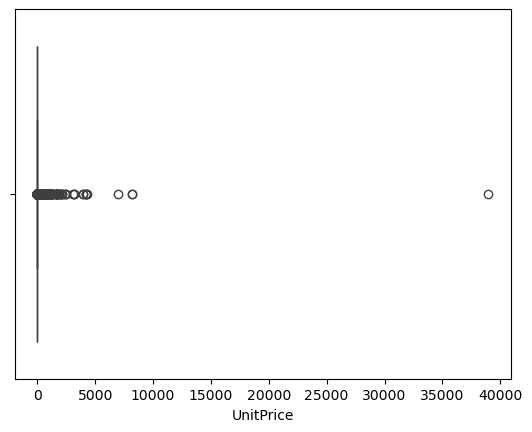

In [45]:
## Outliners in the Dataset
sns.boxplot(x = df["UnitPrice"], data = df)
plt.show()

In [32]:
## Top 5 customers to give the most sales

In [41]:
Top_Customers = df.groupby("CustomerID")["Total Sales"].sum().nlargest()
Top_Customers

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: Total Sales, dtype: float64

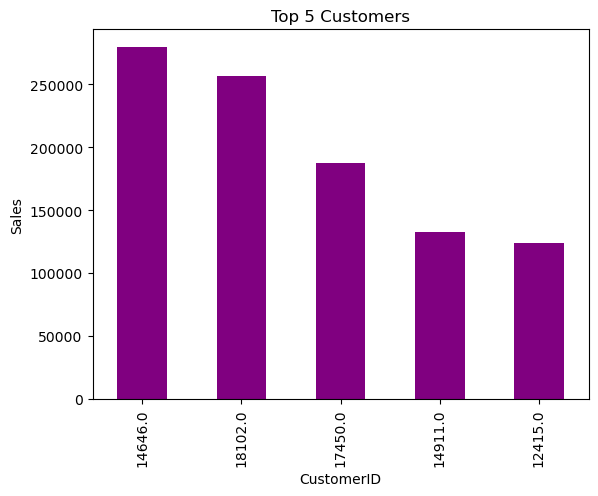

In [58]:
Top_Customers.plot(kind = "bar",color = "purple")
plt.ylabel("Sales")
plt.title("Top 5 Customers")
plt.show()